In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("shopping_data.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
from scipy.cluster.hierarchy import dendrogram,linkage #Linkage is distance measure

In [3]:
data = df[['Age','Annual Income (k$)']] #Selecting Numerical Columns only

In [4]:
data.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


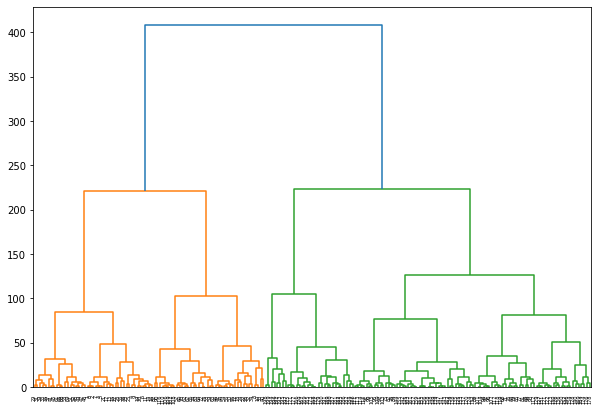

In [5]:
link = linkage(data,method='ward') #General use method Ward for most of the datasets
plt.figure(figsize=(10,7)) #Increasing the Image size
dendrogram(link)
plt.show()

In [6]:
data.shape

(200, 2)

In [7]:
# Optional
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster.fit(data)
cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(0, 0.5, 'Income')

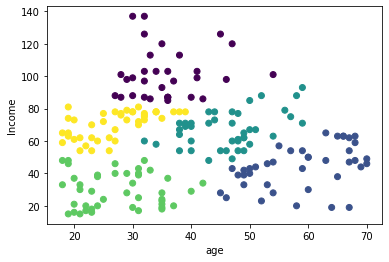

In [8]:
plt.scatter(data['Age'],data['Annual Income (k$)'], c = cluster.labels_ )
plt.xlabel("age")
plt.ylabel("Income")

In [9]:
data['cluster'] = cluster.labels_

C:\Users\Dell\AppData\Local\Temp\ipykernel_4848\3808512675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster.labels_


In [10]:
data.head(20)

,Age,Annual Income (k$),cluster
0,19,15,3
1,21,15,3
2,20,16,3
3,23,16,3
4,31,17,3
5,22,17,3
6,35,18,3
7,23,18,3
8,64,19,1
9,30,19,3


# K-means Clustering

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Income Data.csv')
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


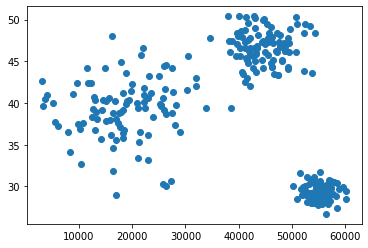

In [12]:
plt.scatter(df['income'],df['age'])
plt.show()

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(df)

KMeans(n_clusters=3)

In [14]:
km.cluster_centers_

array([[4.30539326e+04, 4.64191011e+01],
       [1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01]])

In [15]:
df['cluster'] = km.labels_

In [16]:
df.head(10)

,income,age,cluster
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1
5,19800.0,41.45,1
6,51500.0,31.55,2
7,39900.0,48.20,0
8,13000.0,36.80,1
9,31900.0,43.05,0


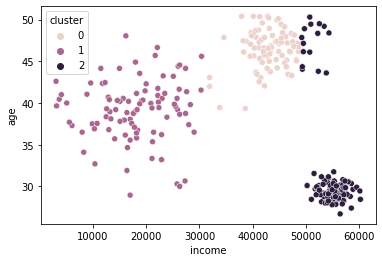

In [17]:
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=df)
plt.show()

#As the data is not precisiely clustered, there is need to scale the data
#Think about outliers here

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(df[['income','age']])
scaled_df[:5]

array([[ 0.09718548,  1.3701637 ],
       [ 0.90602749, -1.3791283 ],
       [ 0.51405021,  1.10388844],
       [-1.27162408,  0.23849387],
       [-1.32762083, -0.35396857]])

In [19]:
scaled_df = pd.DataFrame(scaled_df, columns=['income','age'])
scaled_df.head()

,income,age
0,0.097185,1.370164
1,0.906027,-1.379128
2,0.514050,1.103888
3,-1.271624,0.238494
4,-1.327621,-0.353969


In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(scaled_df)

KMeans(n_clusters=3)

In [21]:
scaled_df['cluster'] = km.labels_

In [22]:
scaled_df.isna().sum()

income     0
age        0
cluster    0
dtype: int64

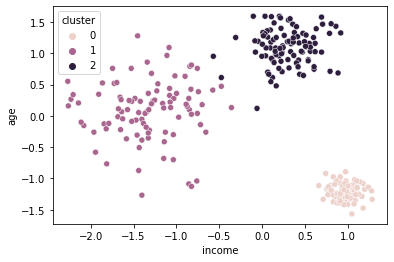

In [23]:
import seaborn as sns
sns.scatterplot(x='income',y='age',hue='cluster',data=scaled_df)
plt.show()

In [24]:
len(km.labels_)

300

In [25]:
len(df)

300

In [26]:
# How to select number of clusters

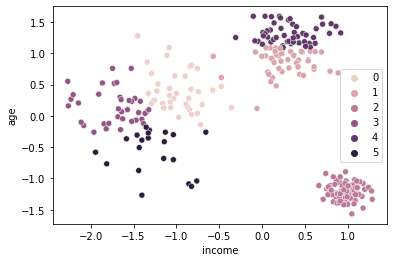

In [39]:
km = KMeans(n_clusters=6)

km.fit(scaled_df)
sns.scatterplot(x='income',y='age',hue=km.labels_,data=scaled_df)
plt.show()

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(scaled_df[['income','age']])

KMeans(n_clusters=3)

In [41]:
scaled_df[['income','age']]

,income,age
0,0.097185,1.370164
1,0.906027,-1.379128
2,0.514050,1.103888
3,-1.271624,0.238494
4,-1.327621,-0.353969
...,...,...
295,-0.077027,1.017349
296,-0.755210,0.757731
297,0.912249,-1.359158
298,0.140739,0.850927


In [30]:
scaled_df['cluster'] = km.labels_
scaled_df.head()

,income,age,cluster
0,0.097185,1.370164,0
1,0.906027,-1.379128,1
2,0.514050,1.103888,0
3,-1.271624,0.238494,2
4,-1.327621,-0.353969,2


In [31]:
df.head()

,income,age,cluster
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


In [32]:
df['new_cluster'] = km.labels_

In [33]:
df.head()

,income,age,cluster,new_cluster
0,41100.0,48.75,0,0
1,54100.0,28.10,2,1
2,47800.0,46.75,0,0
3,19100.0,40.25,1,2
4,18200.0,35.80,1,2


In [34]:
df.groupby('new_cluster').mean()[['income','age']]

,income,age
new_cluster,,
0,44308.737864,46.627184
1,55204.000000,29.384000
2,18321.649485,39.140206


In [35]:
df.groupby('new_cluster').std()[['income','age']]

,income,age
new_cluster,,
0,4390.321503,2.151559
1,1951.943864,0.921458
2,6924.747691,3.558665


## How to Determine the number of clusters

In [42]:
km.inertia_  
#Measures how close is your datapoint to the cluster centroid
#Tells you how good is your number of K
#More inertia better is the value of K

58.30120949883502

In [43]:
inertia = []
for i in range(2,15):
  km = KMeans(n_clusters=i)
  km.fit(scaled_df[['income','age']])
  inertia.append(km.inertia_)
print(inertia)

[238.5343749010686, 58.30120949883502, 42.90589375497656, 33.85739253237397, 28.865081636787366, 25.50614136152412, 22.793042272817615, 19.577260742625292, 18.10891732389033, 16.464743965332605, 15.007119013312845, 13.995742465708808, 12.896171998553214]


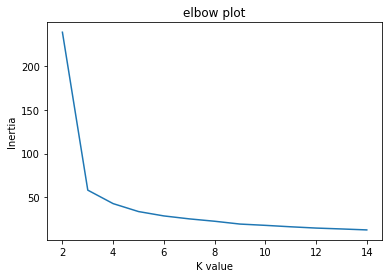

In [44]:
plt.plot(range(2,15), inertia)
plt.xlabel("K value")
plt.ylabel("Inertia")
plt.title("elbow plot")
plt.show()